![image-3.png](https://github.com/cafawo/Derivatives/blob/main/figures/fscampus_small.png?raw=1)

# Derivatives

[**Prof. Dr. Fabian Woebbeking**](https://woebbeking.info/)</br>
Assistant Professor of Financial Economics</br>

## Case 1: Warm-up

The idea of this case is to familiarize yourself with the use of Colab and some very basic Python coding. Before you start:

* Familiarize yourself with saving and opening a Notebook on Colab (you might lose all your hard work otherwise): [README.md](https://github.com/cafawo/Derivatives)
* Refresh you knowledge on **code** vs **text** (Markdown) cells: https://colab.research.google.com/notebooks/markdown_guide.ipynb

### Part 1

#### Task: Plot the payout diagram of a put option. (Try out ChatGPT if you have not done so already.)

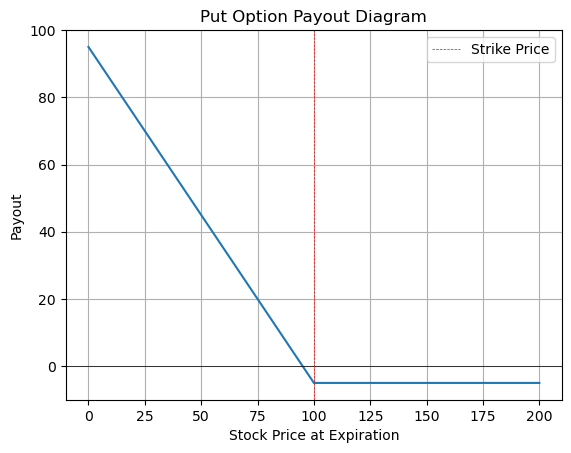

In [1]:
# ChatGPT: "Give me the Python code for plotting the payout diagram of a put option."

import matplotlib.pyplot as plt

# Parameters
strike_price = 100  # The strike price of the put option
premium = 5         # The premium paid for the put option

# Generate a range of possible stock prices at expiration, from 0 to 200
stock_prices_at_expiration = range(0, 201)

# Calculate the payout of the put option for each possible stock price at expiration
payouts = [max(0, strike_price - stock_price) - premium for stock_price in stock_prices_at_expiration]

# Plot the payout diagram
plt.figure()
plt.plot(stock_prices_at_expiration, payouts)
plt.title('Put Option Payout Diagram')
plt.xlabel('Stock Price at Expiration')
plt.ylabel('Payout')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(strike_price, color='red', linestyle='--', linewidth=0.5, label='Strike Price')
plt.legend()
plt.grid(True)
plt.show()

#### Task: What kind of option portfolio/strategy do you see below? Why would anyone want it?

Straddle: long volatility

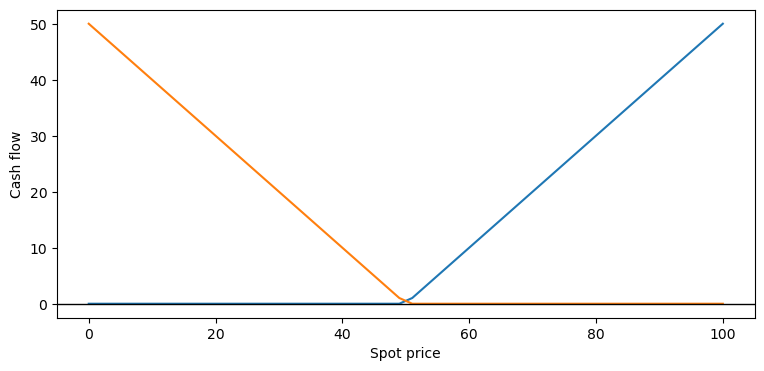

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# Some parameters (see tasks)
S_T = np.linspace(0,100)
K = 50

# Portfolio
CF_T = + np.maximum(S_T - K, 0)
CF2_T =  + np.maximum(K - S_T, 0)

# Plotting
plt.figure('PCP', figsize=(9,4))
plt.plot(S_T, CF_T)
plt.plot(S_T, CF2_T)
plt.axhline(y=0, linewidth=1, color="black")
plt.xlabel("Spot price")
plt.ylabel("Cash flow")
plt.annotate("K", (K,-5))
plt.show()

#### Task: Explain the difference between a long position in a forward and a long position in a call.

* Obligation (symmetric)
* Option (asymmetric)

#### Task: Explain the concept of put-call-parity.

Put-Call-Parity is the arbitrage relationship between (European) put, call, and forward.

$$PV(Call) - PV(Put) = S_0 - PV(K)$$

#### Task: Evaluate a portfolio consisting of a long call on a share with strike price $K$ and a short put with identical strike. Please solve graphically and algebraically.

$$\begin{aligned}
CF_T &= max(S_T - K, 0) - max(K - S_T, 0)\\
&= max(S_T - K, 0) + min(- K + S_T, 0)\\
&= max(S_T - K, 0) + min(S_T - K, 0)\\
&= S_T - K\\
\end{aligned}$$

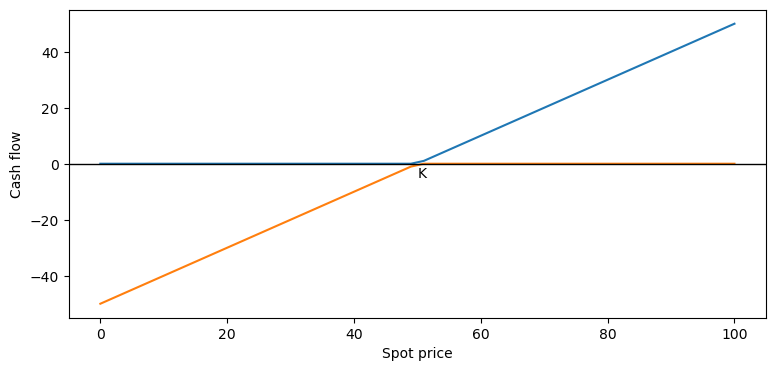

In [3]:
# Hint: adopt the code from above

# Your code ...

# Imports
import numpy as np
import matplotlib.pyplot as plt

# Some parameters (see tasks)
S_T = np.linspace(0,100)
K = 50

# Portfolio
CF_T = + np.maximum(S_T - K, 0)
CF2_T =  - np.maximum(K - S_T, 0)

# Plotting
plt.figure('PCP', figsize=(9,4))
plt.plot(S_T, CF_T)
plt.plot(S_T, CF2_T)
plt.axhline(y=0, linewidth=1, color="black")
plt.xlabel("Spot price")
plt.ylabel("Cash flow")
plt.annotate("K", (K,-5))
plt.show()

#### Task: Evaluate a portfolio consisting of a long forward on a share with exercise price $K$ and a long put with identical strike. Please solve graphically and algebraically.

$$\begin{aligned}
CF_T &= S_T - K + max(K - S_T, 0)\\
&=  max(K - S_T + S_T - K, S_T - K)\\
&=  max(S_T - K, 0)\\
\end{aligned}$$

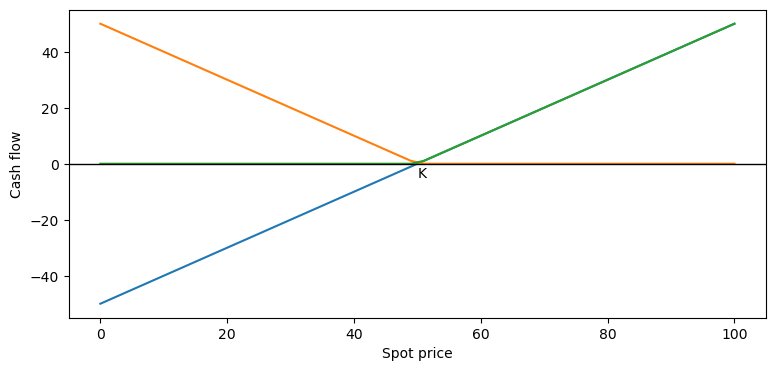

In [4]:
# Hint: adopt the code from above

# Your code ...

# Imports
import numpy as np
import matplotlib.pyplot as plt

# Some parameters (see tasks)
S_T = np.linspace(0,100)
K = 50

# Portfolio
CF_T = S_T - K
CF2_T =  np.maximum(K - S_T, 0)
CF_combined_T = CF_T + CF2_T

# Plotting
plt.figure('PCP', figsize=(9,4))
plt.plot(S_T, CF_T)
plt.plot(S_T, CF2_T)
plt.plot(S_T, CF_combined_T)
plt.axhline(y=0, linewidth=1, color="black")
plt.xlabel("Spot price")
plt.ylabel("Cash flow")
plt.annotate("K", (K,-5))
plt.show()

### Part 2

#### Explain the difference between open interest and trading volume.

* open interest: number of open contracts  (Liquidity of the contract)
* trading volume: today’s trading volume (Liquidity of the day)

#### Which elements are especially important when you create a future contract?

* Underlying
* Size
* Quote
* Settlement Procedure
* Settlement Price


#### Build a function to calculate the FV as a function of PV, maturity, interest, number of compounding periods during each year.

In [5]:
# Hint:
def function_name(input_a, input_b):
    output = input_a / input_b ** 2
    return output

print(f"The output of function_name(...) is: {function_name(1000, 10)}")

# Your code ...

The output of function_name(...) is: 10.0


In [6]:
def FV(PV, r, T, m):
    return PV * (1 + r / m)**(T * m)

print(f"The output of FV(100, 0.1, 1, 1) is: {FV(100, 0.1, 1, 1):,.2f}")
print(f"The output of FV(100, 0.1, 1, 2) is: {FV(100, 0.1, 1, 2):,.2f}")
print(f"The output of FV(1, 1, 1, 10000) is: {FV(1, 1, 1, 10000):,.4f}")

The output of FV(100, 0.1, 1, 1) is: 110.00
The output of FV(100, 0.1, 1, 2) is: 110.25
The output of FV(1, 1, 1, 10000) is: 2.7181


#### A note on output formatting 

As we like it precise, it makes little sense to round during calculations, hence, we (string) format the final output (see example below and https://docs.python.org/3/tutorial/inputoutput.html).

In [7]:
# Ugly
print(1000 + 1/3)

# Not that ugly
print(f"Not that ugly: {1000 + 1/3:,.2f}")

# Interest rates should be formatted like this
print(f"Interest rate format: {1/13 * 100:,.4f}%")

1000.3333333333334
Not that ugly: 1,000.33
Interest rate format: 7.6923%


#### Explain (solve) and calculate for an ISMA rate of 10% the SIA, money and continuous rates. Also calculate the FV in one year using all methods.

$C_T = C_T$. For $\frac{act}{act}$ and $\frac{30}{360}$, a full year $T = \frac{365}{365} = 1$ 

* ISMA to MM

$$\begin{aligned}
1+r_{mm}T_{mm} &= (1+r_{isma})^T\\
r_{mm} T_{mm} &=  r_{isma}\\
r_{mm} \frac{365}{360} &=  r_{isma}\\
r_{mm}  &=  r_{isma} \frac{360}{365}\\
\end{aligned}$$


* ISMA to SIA

$$\begin{aligned}
(1+r_{sia}/2)^{2T} &= (1+r_{isma})^T\\
r_{sia} &= ((1+r_{isma})^{0.5} - 1) * 2\\
\end{aligned}$$




In [8]:
# Your code

import numpy as np

def isma_to(r_isma, type):
    if type.lower() == 'mm':
        return r_isma*360/365
    elif type.lower() == 'sia':
        return ((1+r_isma)**0.5-1)*2
    elif type.lower() == 'cont':
        return np.log(1+r_isma)


print(f"r_isma  = {0.1 * 100:.4f}%")
print(f"r_mm    = {isma_to(0.1, 'mm') * 100:.4f}%")
print(f"r_sia   = {isma_to(0.1, 'sia') * 100:.4f}%")
print(f"r_cont  = {isma_to(0.1, 'cont') * 100:.4f}%")

r_isma  = 10.0000%
r_mm    = 9.8630%
r_sia   = 9.7618%
r_cont  = 9.5310%


#### Convert 10% SIA (US) into ISMA (Europe).

In [9]:
# Your code

sia2isma = (1 + 0.1 / 2) ** 2 -1
print(f"10.00% SIA    = {sia2isma * 100:.4f}% ISMA")

isma2sia = ((1 + 0.1025) ** 0.5 - 1) * 2
print(f"10.25% ISMA   = {isma2sia * 100:.4f}% SIA")



10.00% SIA    = 10.2500% ISMA
10.25% ISMA   = 10.0000% SIA


#### What is the difference between the US and Germany when you short the underlying?

* Short Selling: In a typical short selling transaction, an investor borrows shares of a stock from a broker and sells them on the open market. The goal is to buy back those shares at a lower price in the future, return them to the broker, and pocket the difference.

* Naked Short Selling: In a naked short selling transaction, the seller sells shares that they have not borrowed, and in many cases, the shares may not even exist (i.e., they have not been issued by the company).

Since the financial crisis in 2008, naked short selling is illegal in both jurisdictions, however, instances of naked short selling have occurred in the U.S since. One famous example happened fairly recently, with GameStop shares.